# Problem Statement
>### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

>### The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

>### The company wants to know:

>>### Which variables are significant in predicting the price of a house, and

>>### How well those variables describe the price of a house.

<html>
<body>
    <h1 style="color: red">Importing Data and Libraries</h1>
</body>
</html>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.width',20000)

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso,RidgeCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error
import sklearn.metrics as metrics

In [2]:
housing_df = pd.read_csv("train.csv")

In [3]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<html>
<body>
    <h1 style="color: red">Data Transformation</h1>
</body>
</html>

>## Droping Id Feature and created new Features

In [4]:
housing_df = housing_df.drop('Id',axis=1)

In [5]:
# housing_df['Property_age'] =   np.square( housing_df['YrSold'] - housing_df['YearBuilt'] )  * housing_df['OverallQual'] / 10
housing_df['Property_age'] =   ( (housing_df['YearBuilt'] - housing_df['YearBuilt'].min()) )
housing_df['Selling_duration'] =   housing_df['YearBuilt'] - housing_df['YearRemodAdd'] + 130
housing_df['Selling_duration'] = np.square(housing_df['Selling_duration'] ) * housing_df['OverallQual'] / 10
housing_df.drop(housing_df[(housing_df.Property_age > 2500) ].index,inplace=True,axis=0)

In [6]:
missing_df = pd.DataFrame(housing_df.isnull().sum()/len(housing_df) * 100)
missing_df.set_axis(['missing_data'], axis=1, inplace=True)
missing_df = missing_df.sort_values(by='missing_data',ascending=False)
missing_df[missing_df.missing_data > 40].index
housing_df = housing_df.drop(missing_df[missing_df.missing_data > 5].index,axis=1)
housing_df = housing_df.dropna(axis=0,subset=missing_df[(missing_df.missing_data < 1) & (missing_df.missing_data > 0)].index)
housing_df = housing_df.dropna( axis=0, how="any")
housing_df.shape

(1412, 71)

>## Created seperate Categorical and Non Categorical columns

In [7]:
col_num = housing_df.select_dtypes(exclude='object')
col_non_num = housing_df.select_dtypes(include='object')   

In [8]:
col_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Property_age,Selling_duration
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,131,11830.0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,104,10140.0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,129,11648.7
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,43,3937.5
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,128,13520.0


In [9]:
col_non_num.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


<html>
<body>
    <h1 style="color: red">Exploratory data analysis</h1>
</body>
</html>

>## Univariant Analysis

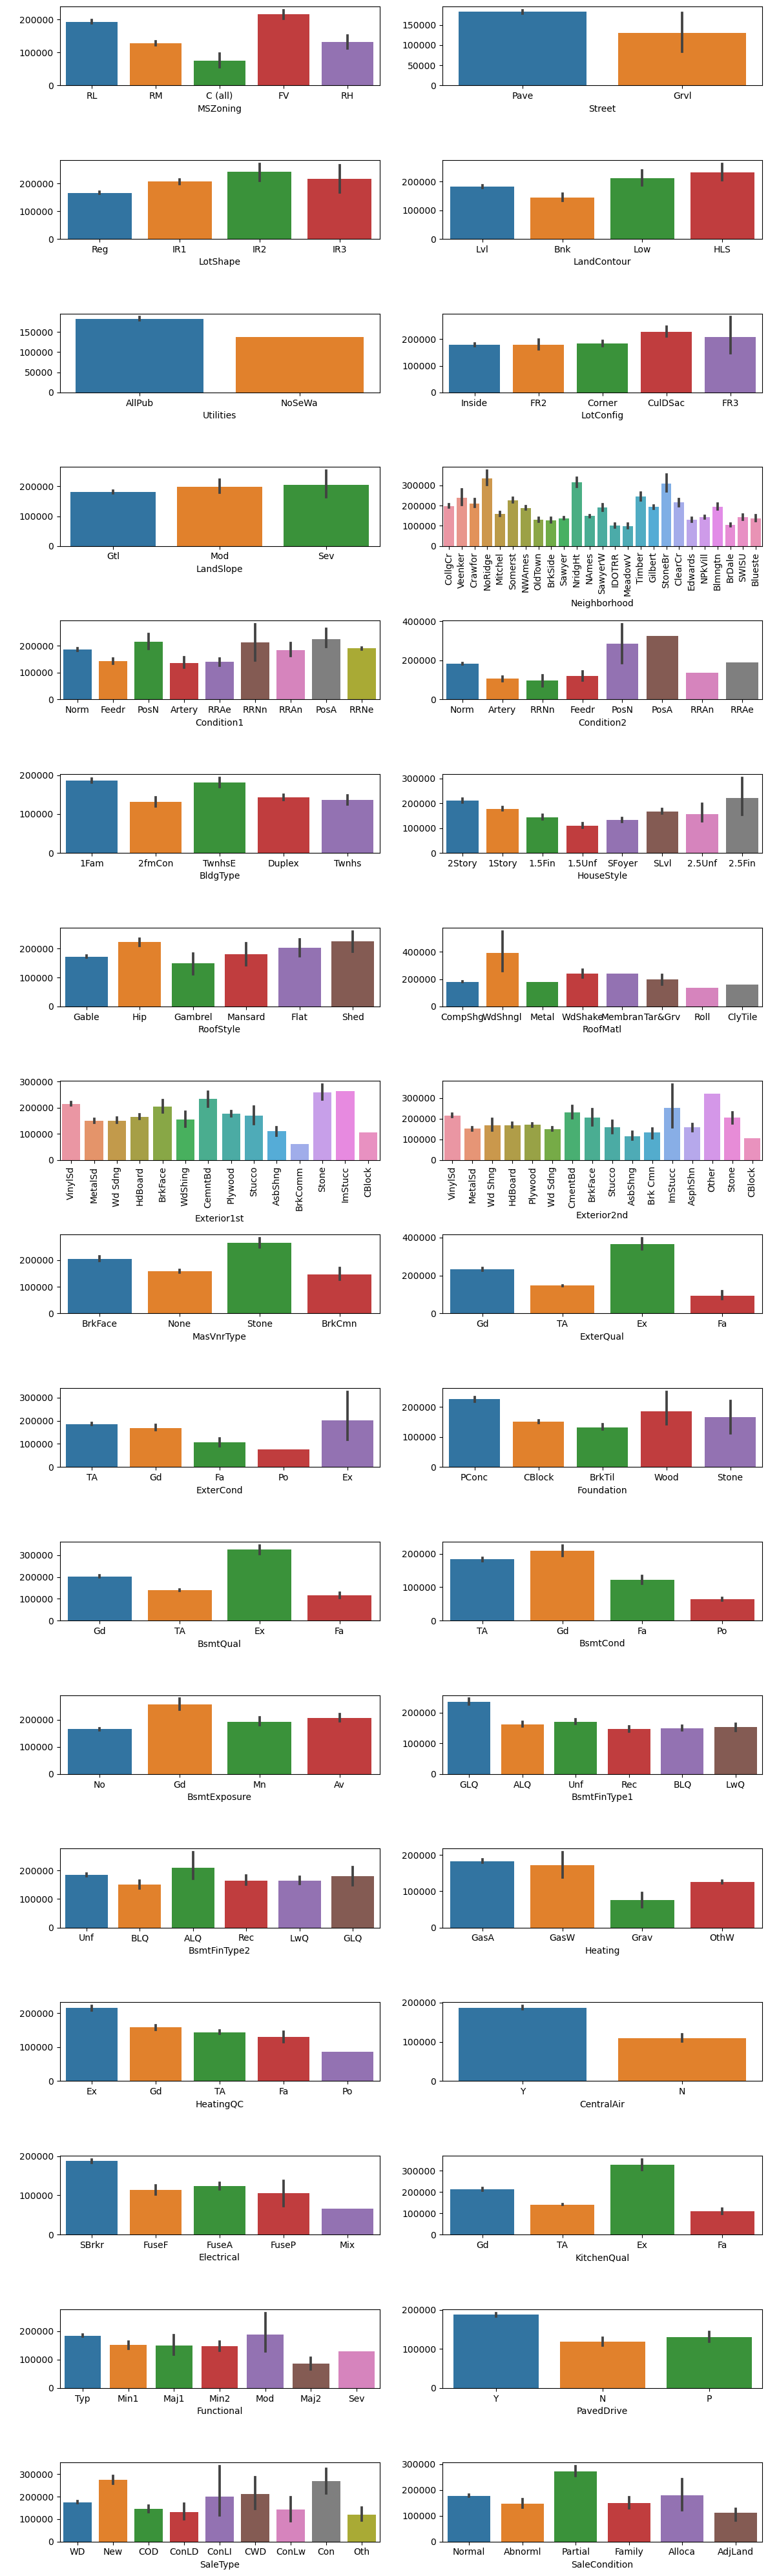

In [10]:
var_r = 0
var_c = 0
var_cnt = 0

fig, ax= plt.subplots(nrows= 17, ncols= 2, figsize= (12, 40))
for i in col_non_num:
    sns.barplot(x=i, y='SalePrice', data=housing_df,ax= ax[var_r][var_c])
    ax[var_r][var_c].set_ylabel(' ')
    ax[var_r][var_c].set_xlabel(i)
    if len(housing_df[i].unique()) > 10:
        ax[var_r][var_c].tick_params(axis='x', rotation=90)
    var_cnt +=1
    if var_cnt %2 ==0:
        var_r +=1
        var_c = 0
    else:
        var_c +=1
plt.tight_layout()
plt.show()

## Conclusion :
>###    A. MSZoning: Floating Village Residential type zone has higher price compared to other zones
>###    B. Street : Streets with Gravel have higher price.
>###    C. LandContour(Flatness of the property) : Hillside houses have higher price
>###    D. CentralAir (Central air conditioning) : House which has central air conditioning are priced on higher side.

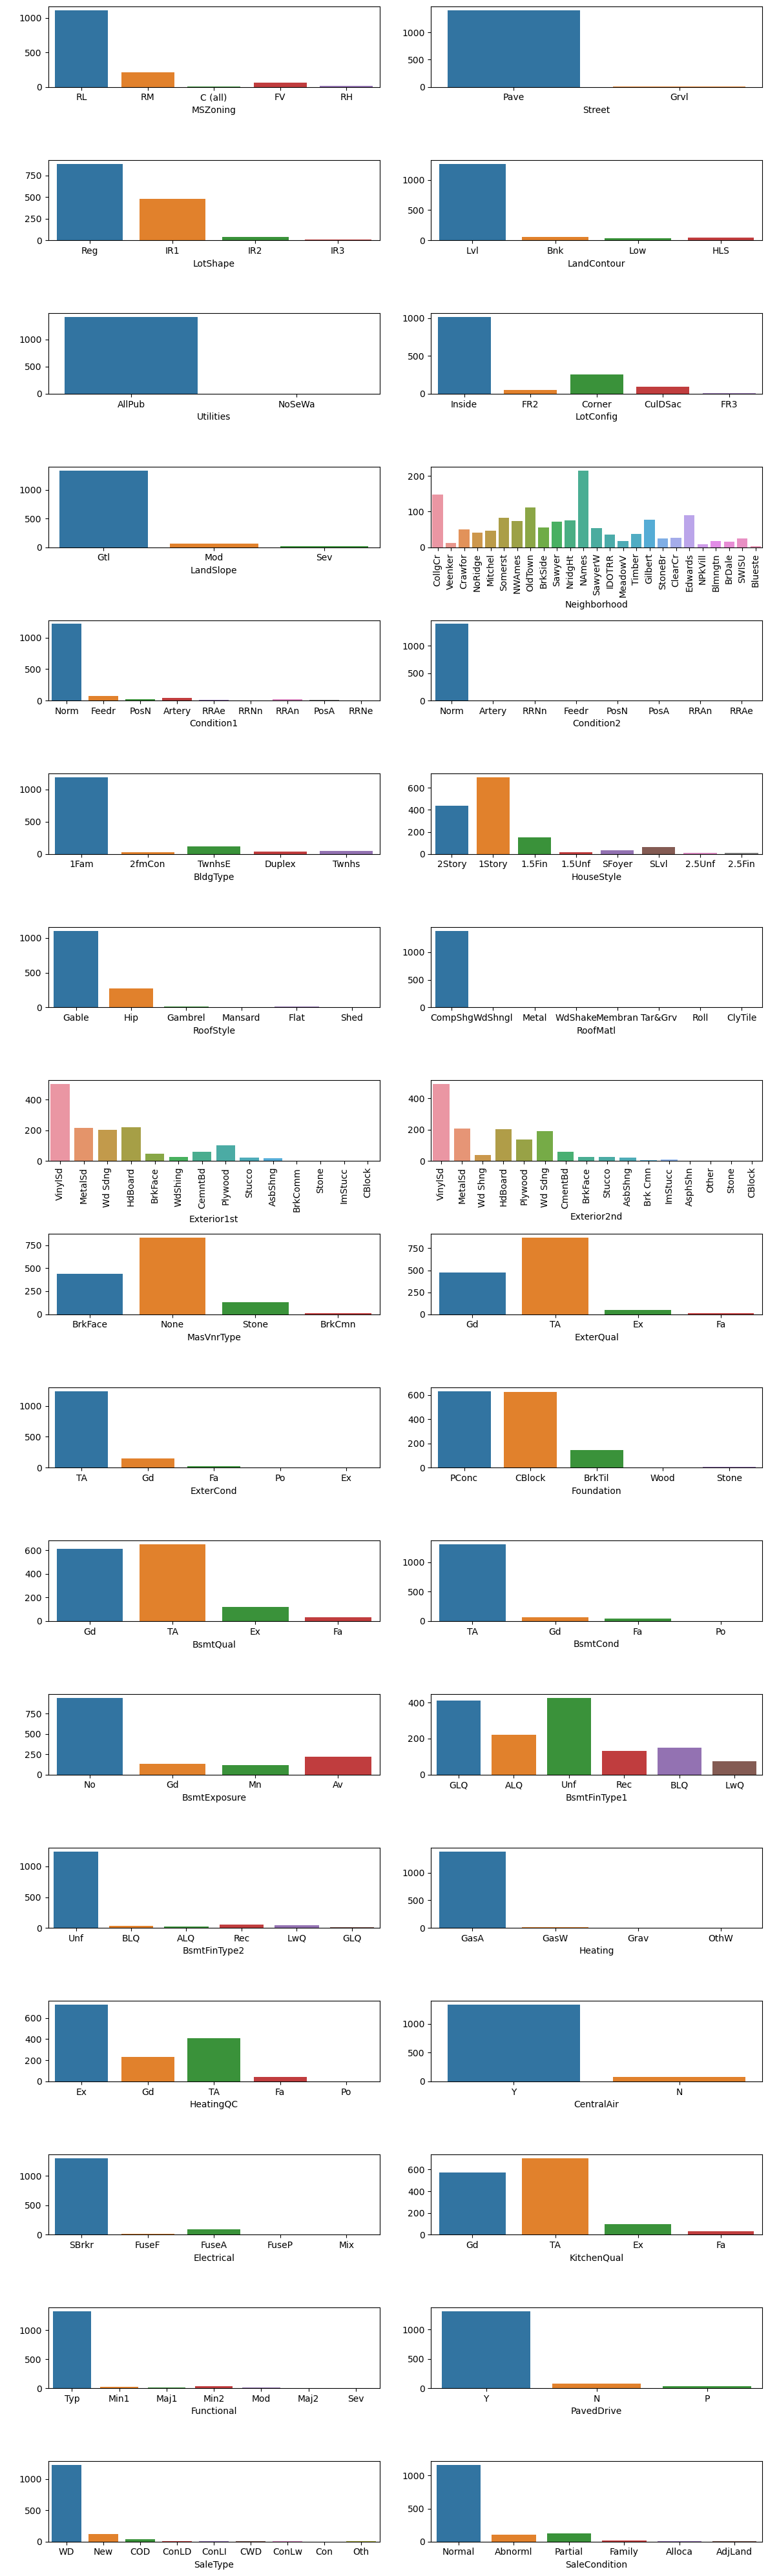

In [11]:
var_r = 0
var_c = 0
var_cnt = 0

fig, ax= plt.subplots(nrows= 17, ncols= 2, figsize= (12, 40))
for i in col_non_num:
    sns.countplot(x=i, data=housing_df,ax= ax[var_r][var_c])
    # sns.barplot(x=i, y='SalePrice', data=housing_df,ax= ax[var_r][var_c])
    ax[var_r][var_c].set_ylabel(' ')
    ax[var_r][var_c].set_xlabel(i)
    if len(housing_df[i].unique()) > 10:
        ax[var_r][var_c].tick_params(axis='x', rotation=90)
    var_cnt +=1
    if var_cnt %2 ==0:
        var_r +=1
        var_c = 0
    else:
        var_c +=1
        

plt.tight_layout()
plt.show()

## Conclusion:
>### Most of the houses have Central air conditioning
>### Will drop below features as they have only one value with higher percentage. (SaleCondition,SaleType,PavedDrive,Functional,CentralAir,BsmtFinType2, Heating,RoofMatl,Condition2,Street,Utilities)


>## Bivariant Analysis

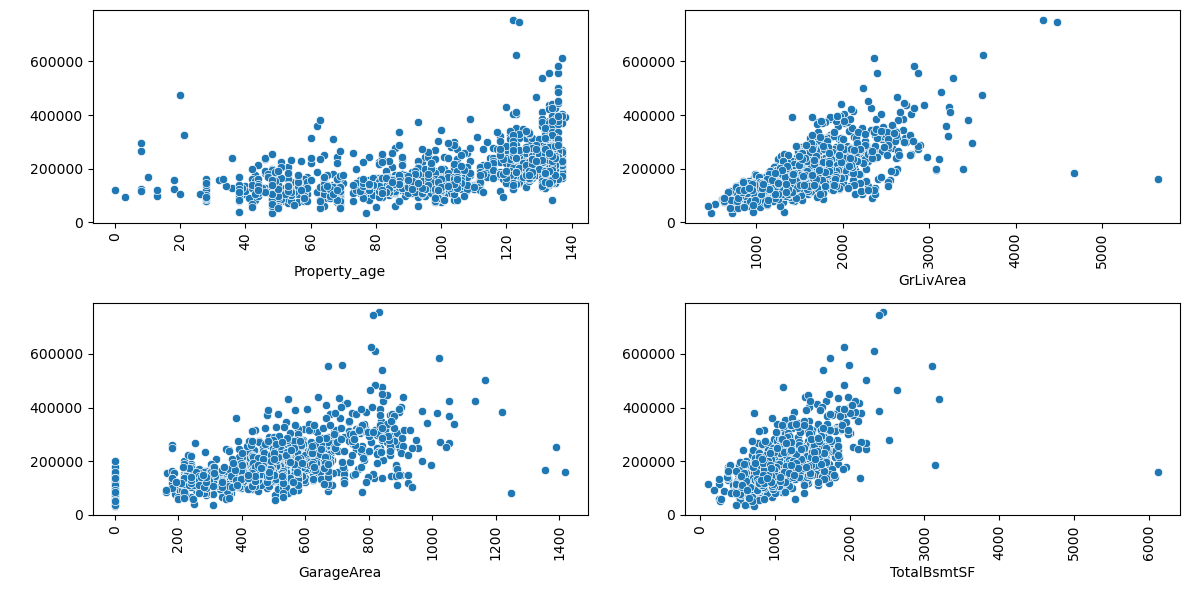

In [12]:
var_r = 0
var_c = 0
var_cnt = 0

fig, ax= plt.subplots(nrows= 2, ncols= 2, figsize= (12, 6))
for i in ['Property_age','GrLivArea','GarageArea','TotalBsmtSF']:
    sns.scatterplot(data=housing_df, x=i, y="SalePrice",ax= ax[var_r][var_c])
    # sns.countplot(x=i, data=housing_df,ax= ax[var_r][var_c])
    ax[var_r][var_c].set_ylabel(' ')
    ax[var_r][var_c].set_xlabel(i)
    if len(housing_df[i].unique()) > 10:
        ax[var_r][var_c].tick_params(axis='x', rotation=90)
    var_cnt +=1
    if var_cnt %2 ==0:
        var_r +=1
        var_c = 0
    else:
        var_c +=1
        

plt.tight_layout()
plt.show()

>## Conclusion: Will remove a few outliers referring to the above scatterplot as they have low sale prices and high GrLivArea, GarageArea, and TotalBsmtSF values.
## Droping as per the above conclusion

In [13]:
less_uni_value = ['SaleCondition','SaleType','PavedDrive','Functional','CentralAir','BsmtFinType2', 'Heating','RoofMatl','Condition2','Street','Utilities']
housing_df = housing_df.drop(less_uni_value,axis=1)

In [14]:
housing_df.drop(housing_df[(housing_df.GrLivArea > 4000) ].index,inplace=True,axis=0)

In [15]:
housing_df.drop(housing_df[(housing_df.GarageArea > 1200) ].index,inplace=True,axis=0)

In [16]:
housing_df.drop(housing_df[(housing_df.TotalBsmtSF > 4000) ].index,inplace=True,axis=0)

>## Scaling data

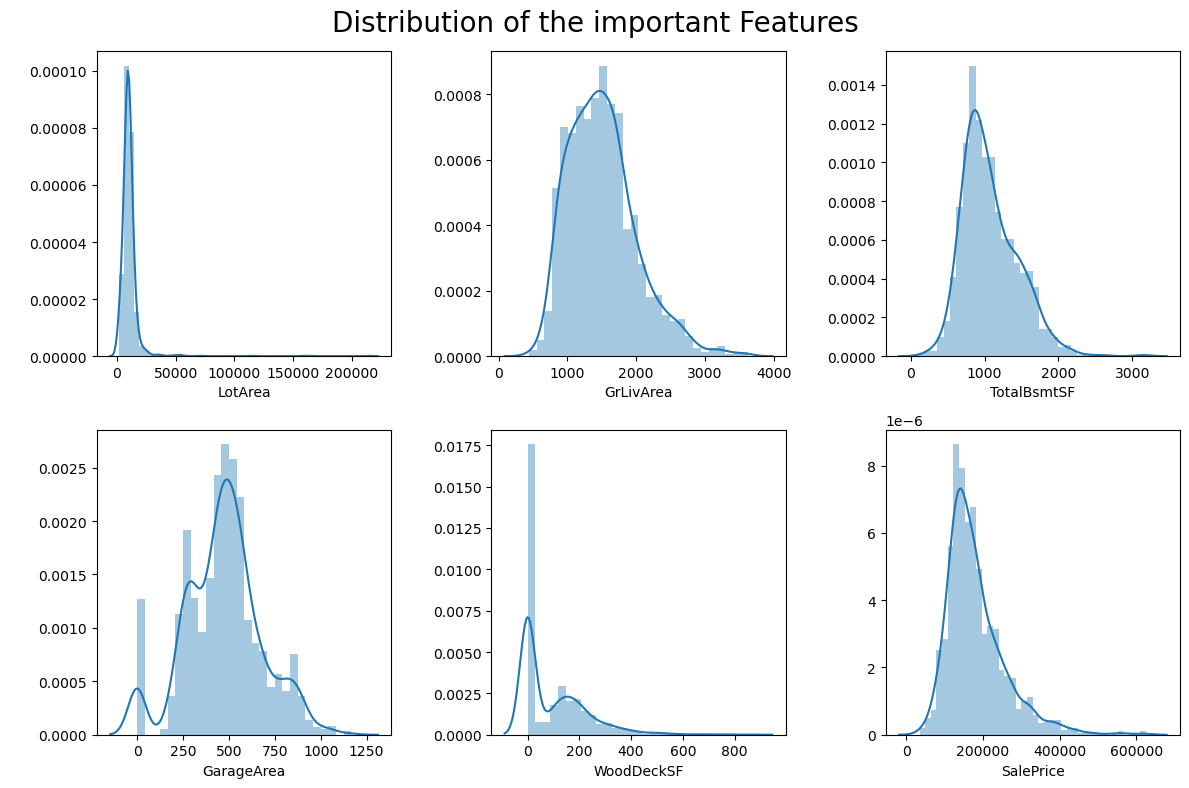

In [17]:
def funct_distribution():
    var_r = 0
    var_c = 0
    var_cnt = 0
    
    fig, ax= plt.subplots(nrows= 2, ncols= 3, figsize= (12, 8))
    fig.suptitle('Distribution of the important Features', fontsize= 20)
    
    for i in ['LotArea','GrLivArea','TotalBsmtSF','GarageArea','WoodDeckSF','SalePrice']:
        sns.distplot(housing_df[i], ax= ax[var_r][var_c])
        ax[var_r][var_c].set_ylabel(' ')
        ax[var_r][var_c].set_xlabel(i)
    
        var_cnt +=1
        if var_cnt %3 ==0:
            var_r +=1
            var_c = 0
        else:
            var_c +=1
            
    plt.tight_layout()
    plt.show()
funct_distribution()

In [18]:
# housing_df['LotArea'] = np.log2(housing_df['LotArea'])
housing_df['TotalBsmtSF'] = np.log2(housing_df['TotalBsmtSF'])
housing_df['GarageArea'] = np.sqrt(housing_df['GarageArea'])
housing_df['SalePrice'] = np.sqrt(housing_df['SalePrice'] +1)
housing_df['1stFlrSF'] = np.sqrt(housing_df['1stFlrSF'] )
# housing_df['WoodDeckSF'] = np.log2(housing_df['WoodDeckSF'] +1)
housing_df['GrLivArea'] = np.log2(housing_df['GrLivArea']+1)

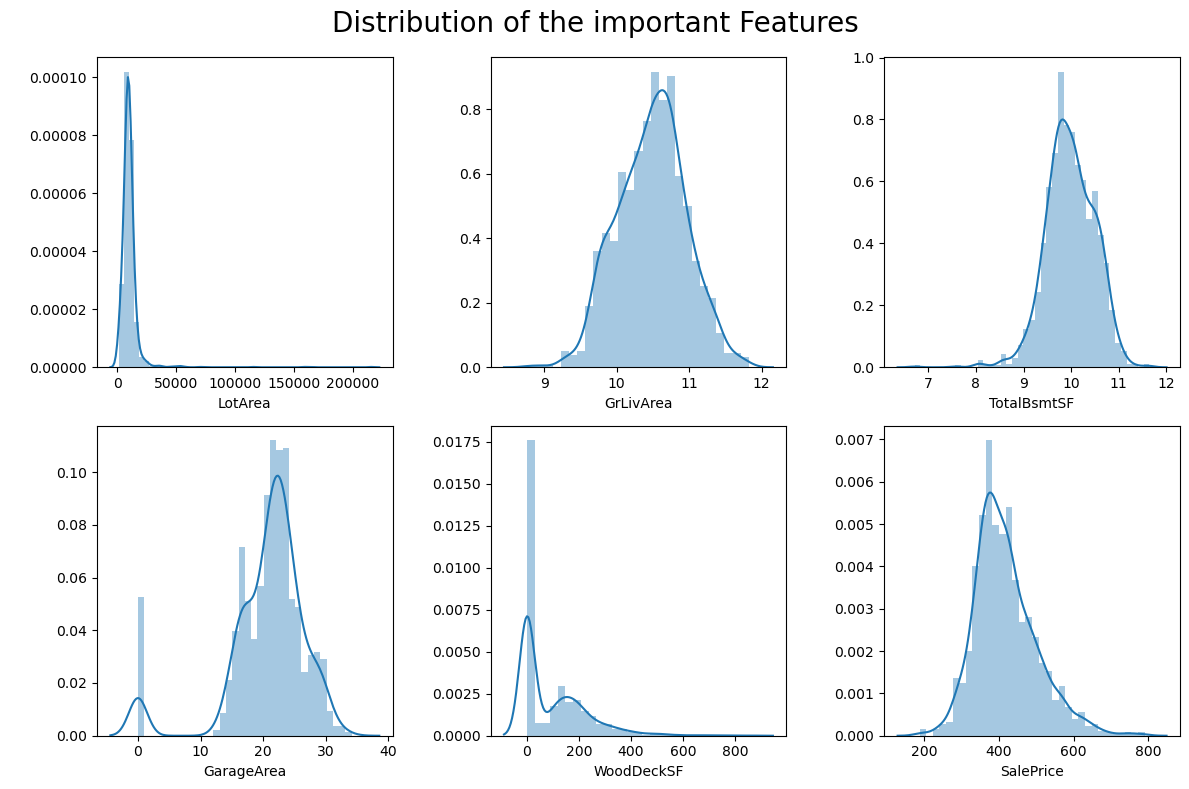

In [19]:
funct_distribution()

In [20]:
col_num = housing_df.select_dtypes(exclude='object')
col_non_num = housing_df.select_dtypes(include='object') 

<html>
<body>
    <h1 style="color: red">Multiple linear regression</h1>
</body>
</html>

<html>
<body>
    <h1 style="color: red">Model Selection</h1>
</body>
</html>

### Creating Dummy Variables

In [21]:
housing_df_dummies = pd.get_dummies(col_non_num,drop_first=True)

In [22]:
housing_df = pd.concat([col_num,housing_df_dummies],axis=1)

In [23]:
for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = housing_df[feature] - housing_df[feature].min()

In [24]:
X = housing_df.drop(['SalePrice','MSZoning_FV' ,'MSZoning_RH' ,'MSZoning_RL' ,'MSZoning_RM' ,'Neighborhood_StoneBr'], axis=1)
y = housing_df['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [26]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [27]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

### Feature selection

In [28]:
def top_features(n):
    top_cols = []
    lm = LinearRegression()
    lm.fit(X_tr_scaled, y_train)
    rfe = RFE(lm,n_features_to_select= n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    for i in rfe_ranking:
        if i[1]:
            top_cols.append(i[0])
    return top_cols

In [29]:
top_feat = top_features(50)
# top_feat

### Model building

In [30]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())   

In [31]:
build_regressor(X_tr_scaled,y_train,top_feat)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     237.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:26:27   Log-Likelihood:                -4785.3
No. Observations:                1053   AIC:                             9669.
Df Residuals:                    1004   BIC:                             9912.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  416.3002 

In [32]:
X_train_rfe = X_tr_scaled[top_feat]
X_test_rfe = X_te_scaled[top_feat]

### GridSearchCV

In [33]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  final_model = model_cv.best_estimator_
  print('*****',model_cv.best_params_)
  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
  print("*" * 70)
  var_round = 4
  print('R2 score - train : ',round(r2_score(y_train,y_train_pred),var_round))
  print('R2 score - test : ',round(r2_score(y_test,y_test_pred),var_round))
  print('RMSE - train : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),var_round))
  print('RMSE - test : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),var_round))

  return final_model, y_test_pred,pd.DataFrame(model_cv.cv_results_)

## Ridge Model

In [34]:
params = {'alpha': [0.0001, 0.001, 0.01,0.5,0.2, 0.1,7.00,8.00,9.00,10.0, 20,30, 50,55, 100,1000 ]}

ridge_final_model, y_test_predicted ,cv_results= build_model(X_train_rfe, y_train, X_test_rfe, params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
***** {'alpha': 0.5}
**********************************************************************
R2 score - train :  0.9189
R2 score - test :  0.9222
RMSE - train :  22.7724
RMSE - test :  25.8544


In [35]:
import sklearn.metrics as metrics
model_ridge = Ridge(0.5)
model_ridge.fit(X_train, y_train)
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))
model_ridge_parameters = list(model_ridge.coef_)
model_ridge_parameters.insert(0, model_ridge.intercept_)
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]
cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
ridge_params_df = ridge_params_df.loc[ridge_params_df['Coef'] != 0]
ridge_params_df= (ridge_params_df.sort_values('Coef', ascending=False)).head(10)
top_10_parm = ridge_params_df['Params'][:10].tolist()
top_10_parm.remove('constant')
print("Top features are as follow:")
for i in top_10_parm:
    print(i,end=' ,')

0.9354752746450201
0.9327688023012026
Top features are as follow:
MasVnrType_Stone ,MasVnrType_None ,MasVnrType_BrkFace ,Exterior1st_BrkFace ,RoofStyle_Shed ,BsmtExposure_Gd ,Neighborhood_Crawfor ,BsmtCond_TA ,Condition1_PosN ,

## Lasso Model

In [36]:
params = {'alpha': [0.00005,0.0001, 0.001, 0.01, 0.1,7.00,8.00,9.00,10.0, 20, 50,55, 100,1000 ],'fit_intercept':[True],'max_iter':[1000],'tol':[0.01,0.1,1]}

ridge_final_model, y_test_predicted,cv_results = build_model(X_train_rfe, y_train, X_test_rfe, params,model='Lasso')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
***** {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.01}
**********************************************************************
R2 score - train :  0.9189
R2 score - test :  0.9218
RMSE - train :  22.7747
RMSE - test :  25.9211


In [37]:
##  Lasso regression with alpha=0.01
import sklearn.metrics as metrics
model_lasso = Lasso(0.01)
model_lasso.fit(X_train, y_train)
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))
model_lasso_parameters = list(model_lasso.coef_)
model_lasso_parameters.insert(0, model_lasso.intercept_)
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]
cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df= (lasso_params_df.sort_values('Coef', ascending=False)).head(11)
top_10_parm = lasso_params_df['Params'][:11].tolist()
top_10_parm.remove('constant')
print("Top features are as follow:")
for i in top_10_parm:
    print(i,end=' ,')

0.9353742380238944
0.9331112255707196
Top features are as follow:
MasVnrType_Stone ,MasVnrType_None ,MasVnrType_BrkFace ,Exterior1st_BrkFace ,BsmtExposure_Gd ,Neighborhood_Crawfor ,Condition1_PosN ,BsmtCond_TA ,RoofStyle_Shed ,OverallQual ,

# Conclusion
>### A. MSZoning : Floating Village Residential zone has higher sale value.
>### B. Neighborhood(Physical locations within Ames city limits) : Neighborhood with Stone Brook has higher price.
>### C. MasVnrType : Houses with Stone Masonry veneer type has higher sale value.
>### D. Other important parameter are :BsmtExposure,Exterior1st and RoofStyle